In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import csv,os,re
import sklearn
import numpy as np

In [90]:
df = pd.read_csv(r'Data/lyrics_extended.csv')

Measuring correlation between all pairs of numeric features to see if any of them are redundant

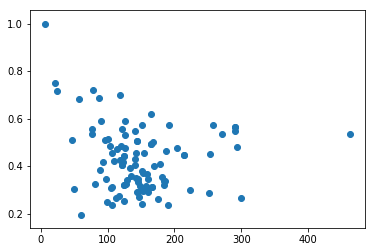

In [3]:
#Scatter plot for Unique_word_count and ttr:
plt.scatter(df['Unique_Word_Count'].loc[:100],df['Type-Token Ratio'].loc[:100])

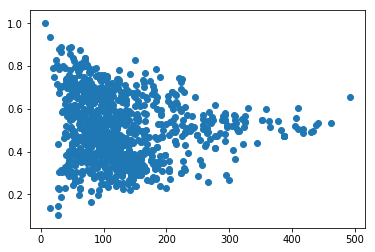

In [4]:
plt.scatter(df['Unique_Word_Count'].loc[:1000],df['Type-Token Ratio'].loc[:1000])

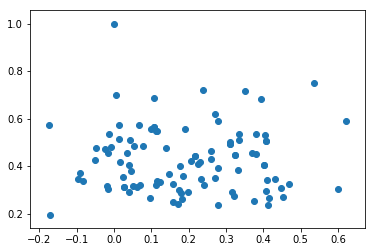

In [7]:
plt.scatter(df['Sentiment Polarity'].loc[:100],df['Type-Token Ratio'].loc[:100])

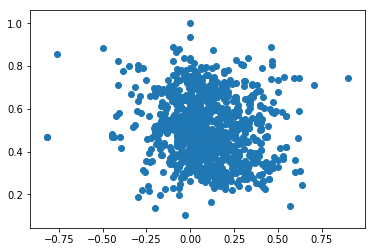

In [8]:
plt.scatter(df['Sentiment Polarity'].loc[:1000],df['Type-Token Ratio'].loc[:1000])

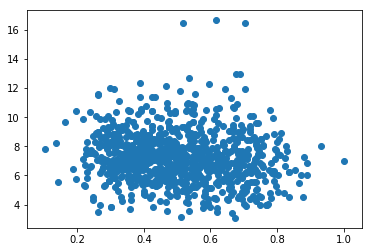

In [10]:
plt.scatter(df['Type-Token Ratio'].loc[:1000],df['Word Density'].loc[:1000])

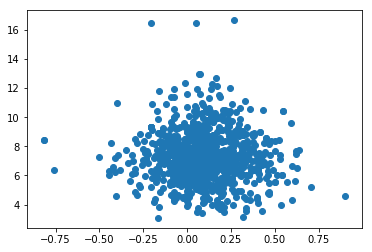

In [11]:
plt.scatter(df['Sentiment Polarity'].loc[:1000],df['Word Density'].loc[:1000])

Description of the nature of the continuous numeric features that we have:

In [13]:
df['Unique_Word_Count'].describe()

count    218856.000000
mean        116.467056
std          73.424519
min           4.000000
25%          75.000000
50%          99.000000
75%         131.000000
max        3062.000000
Name: Unique_Word_Count, dtype: float64

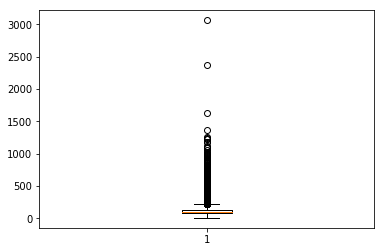

In [17]:
word_count_boxplot = plt.boxplot(df['Unique_Word_Count'].values)


In [22]:
df['Word Density'].describe()

count    218856.000000
mean          7.737440
std           9.105745
min           1.301961
25%           5.959184
50%           7.037037
75%           8.333333
max         633.000000
Name: Word Density, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d308fac400>,
 'caps': [<matplotlib.lines.Line2D at 0x1d308faccc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d308fac2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d308fb6550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d308fb6978>],
 'means': []}

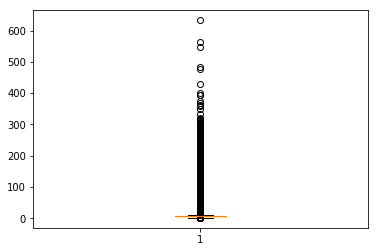

In [23]:
plt.boxplot(df['Word Density'].values)

Approach to removing outlier points: Gaussian Threshold (i.e. remove all points which are more than 3 standard deviations away from the mean)


In [30]:
len(df[df['Word Density'] > 35])

894

In [32]:
len(df[df['Unique_Word_Count'] > 320])

6512

In [34]:
df = df[df['Word Density'] < 35]

In [36]:
df = df[df['Unique_Word_Count'] < 320] #Size of the dataset has come down to 210k

In [42]:
numeric_features_df = df[['Sentiment Polarity','Type-Token Ratio','Unique_Word_Count', 'Word Density']].copy()
#numeric_features_df['Redundant Column'] = numeric_features_df['Unique_Word_Count']/len(numeric_features_df['lyrics'].split(' '))

In [43]:
numeric_features_df.corr(method = 'pearson') 

,Sentiment Polarity,Type-Token Ratio,Unique_Word_Count,Word Density
Sentiment Polarity,1.000000,-0.099165,-0.058539,0.023371
Type-Token Ratio,-0.099165,1.000000,-0.062476,-0.107503
Unique_Word_Count,-0.058539,-0.062476,1.000000,0.196984
Word Density,0.023371,-0.107503,0.196984,1.000000


In [44]:
numeric_features_df.corr(method = 'spearman') 

,Sentiment Polarity,Type-Token Ratio,Unique_Word_Count,Word Density
Sentiment Polarity,1.000000,-0.098897,-0.043151,0.028865
Type-Token Ratio,-0.098897,1.000000,-0.063575,-0.132375
Unique_Word_Count,-0.043151,-0.063575,1.000000,0.233511
Word Density,0.028865,-0.132375,0.233511,1.000000


In [3]:
#Metrics to estimate the efficacy of a set of features to produce meaningful clusters: Silhouette Analysis

Draw histogram plot to see the kind of distribution each of the numeric features have. This serves as a primary normality test

In [ ]:
plt.hist()

Performing analysis on artist-level data

In [5]:
available_features = df.columns[4:]
chosen_features = []

In [8]:
(df['Unique_Word_Count']).describe()

count    218856.000000
mean        116.467056
std          73.424519
min           4.000000
25%          75.000000
50%          99.000000
75%         131.000000
max        3062.000000
Name: Unique_Word_Count, dtype: float64

In [20]:
#df['Unique_Word_Count'].head(40)
df[df['Unique_Word_Count'] == max(df['Unique_Word_Count'])]['lyrics']

10573    RAPROCK LIT POP NEWS COUNTRY R&B; HISTORY SPOR...
Name: lyrics, dtype: object

In [25]:
df_copy = df['Unique_Word_Count'].copy()
maxval = df['Unique_Word_Count'].mean()

In [50]:
#df_copy.apply(lambda x: x/maxval)
df['Word Density']

0          9.640000
1          5.849057
2          4.072727
3          6.988506
4         10.424242
5          3.553571
6          7.125000
7          6.347222
8          6.853333
9          8.234043
10         6.714286
11         6.521277
12         8.057143
13         6.559524
14         6.974359
15         7.763158
16         7.130952
17         7.985075
18         6.274194
19         6.644068
20         6.677966
22         6.644068
23         7.359375
24         8.600000
25         8.283582
26         8.116667
27        16.647059
28         8.627451
29         6.309524
30         7.052632
            ...    
218826     4.842105
218827     6.625000
218828     3.440000
218829     6.375000
218830     5.117647
218831     6.800000
218832     5.833333
218833     4.526316
218834     5.517241
218835     4.642857
218836     6.629630
218837     5.800000
218838     7.275862
218839     5.875000
218840     5.702703
218841     6.880952
218842     5.744186
218843     5.058824
218844     7.636364


In [27]:
df_copy.describe()

count    218856.000000
mean        116.467056
std          73.424519
min           4.000000
25%          75.000000
50%          99.000000
75%         131.000000
max        3062.000000
Name: Unique_Word_Count, dtype: float64

In [48]:
df['Unique_Word_Count'].describe()

count    211395.000000
mean        107.887405
std          53.268922
min           4.000000
25%          74.000000
50%          97.000000
75%         127.000000
max         319.000000
Name: Unique_Word_Count, dtype: float64

In [47]:
df['Word Density'].describe()

count    211395.000000
mean          7.231235
std           2.060282
min           1.301961
25%           5.927404
50%           7.000000
75%           8.250000
max          34.937500
Name: Word Density, dtype: float64

Apply Mini-Max normalization before clustering

In [73]:
max_word_density = max(df['Word Density'])
min_word_density = min(df['Word Density'])

def mini_max_word_density(x):
    denom = max_word_density - min_word_density
    num = max_word_density - x
    return num/denom

In [74]:
max_word_count = max(df['Unique_Word_Count'])
min_word_count = min(df['Unique_Word_Count'])

def mini_max_word_count(x):
    denom = max_word_count - min_word_count
    num = max_word_count - x
    return num/denom

In [79]:
wd = df['Word Density'].copy()

In [83]:
df['Unique_Word_Count'] = df['Unique_Word_Count'].map(lambda x: mini_max_word_count(x))

In [84]:
df['Word Density'] = df['Word Density'].map(lambda x: mini_max_word_density(x))

In [86]:
df.to_csv('lyrics_normalized.csv',index = False)